In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

bigml_59c28831336c6604c800002a.csv



*  **Reading the data into Pandas DataFrame**.
*  Describing the data.

In [2]:
tele = pd.read_csv('../input/bigml_59c28831336c6604c800002a.csv')
print(tele.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


**Checking if dataset has null values**

In [3]:
print(tele.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

**Information on churn**

In [4]:
print(tele.groupby('churn')['phone number'].count())

churn
False    2850
True      483
Name: phone number, dtype: int64


**Splitting the dataset into Train and Test data according to the dimensions needed**

In [5]:
drp = tele[['state','area code','phone number','international plan','voice mail plan','churn']]
X= tele.drop(drp,1)
y= tele.churn
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

* **Applying logistic regression to predict the churn variable.**
* Also measuring the accuracy score of the algorithm.

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic regression score =',round(metrics.accuracy_score(y_test, y_pred),2))

Logistic regression score = 0.87


* Using cross validation with 5 partitions on the data.
* Printing scores of each partition of data.
* Printing mean score of all the partitions.

In [7]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') 
print('Logistic regression of each partition\n',scores)
print('Mean score of all the scores after cross validation =',round(scores.mean(),2)) 

Logistic regression of each partition
 [ 0.85607196  0.85907046  0.85457271  0.85135135  0.85885886]
Mean score of all the scores after cross validation = 0.86


**Confusion matrics to project the accuracy of Logistic Regression algorithm**

Text(33,0.5,'Actual')

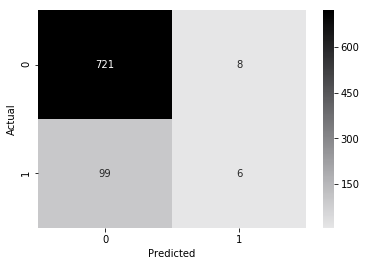

In [8]:
conf = (metrics.confusion_matrix(y_test, y_pred))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Computation of rates from the confusion matrix**

In [9]:
FP = conf[1][0]
FN = conf[0][1]
TP = conf[0][0]
TN = conf[1][1]
print('False Positive ',FP)
print('False Negative ',FN)
print('True Positive ',TP)
print('True Negative ',TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('\nTrue Positive Rate :',round(TPR,2))
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('\nTrue Negative Rate :',round(TNR,2))
# Precision or positive predictive value
PPV = TP/(TP+FP)
print('\nPositive Predictive Value :',round(PPV,2))
# Negative predictive value
NPV = TN/(TN+FN)
print('\nNegative Predictive Value :',round(NPV,2))
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('\nFalse Positive Rate :',round(FPR,2))
# False negative rate
FNR = FN/(TP+FN)
print('\nFalse Negative Rate :',round(FNR,2))
# False discovery rate
FDR = FP/(TP+FP)
print('\nFalse Discovery Rate :',round(FDR,2))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('\nOverall accuracy :',round(ACC,2))

False Positive  99
False Negative  8
True Positive  721
True Negative  6

True Positive Rate : 0.99

True Negative Rate : 0.06

Positive Predictive Value : 0.88

Negative Predictive Value : 0.43

False Positive Rate : 0.94

False Negative Rate : 0.01

False Discovery Rate : 0.12

Overall accuracy : 0.87


* **Applying Random Forest Algorithm on the dataset.**
* Accuracy score of the algorithm on the dataset.

In [10]:
rf_clf = RandomForestClassifier(n_estimators=120, criterion='entropy')
rf_clf.fit(X_train, y_train)
rf_pred_test = rf_clf.predict(X_test)
print('Accuracy of Random forest :',round(metrics.accuracy_score(y_test, rf_pred_test),2))

Accuracy of Random forest : 0.93


* **Applying cross validation on 5 partitions of data using Random Forest.**
* Printing the scores of individual partitions using random forest.
* Printing the average of all scores

In [11]:
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print('Cross Validation scores using random forest \n',rf_scores)
print('Mean of Cross Validation scores',round(rf_scores.mean(),2)) 

Cross Validation scores using random forest 
 [ 0.91754123  0.92503748  0.93253373  0.92492492  0.93393393]
Mean of Cross Validation scores 0.93


**Confusion matrix to project the accuray of Random Forest Algorithm**

Text(33,0.5,'Actual')

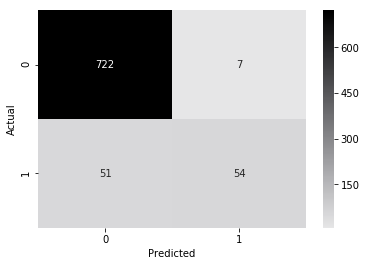

In [12]:
rf_conf = (metrics.confusion_matrix(y_test, rf_pred_test))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(rf_conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Computation of rates from confusion matrix**

In [13]:
FP = rf_conf[1][0]
FN = rf_conf[0][1]
TP = rf_conf[0][0]
TN = rf_conf[1][1]
print('False Positive ',FP)
print('False Negative ',FN)
print('True Positive ',TP)
print('True Negative ',TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('\nTrue Positive Rate :',round(TPR,2))
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('\nTrue Negative Rate :',round(TNR,2))
# Precision or positive predictive value
PPV = TP/(TP+FP)
print('\nPositive Predictive Value :',round(PPV,2))
# Negative predictive value
NPV = TN/(TN+FN)
print('\nNegative Predictive Value :',round(NPV,2))
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('\nFalse Positive Rate :',round(FPR,2))
# False negative rate
FNR = FN/(TP+FN)
print('\nFalse Negative Rate :',round(FNR,2))
# False discovery rate
FDR = FP/(TP+FP)
print('\nFalse Discovery Rate :',round(FDR,2))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('\nOverall accuracy :',round(ACC,2))

False Positive  51
False Negative  7
True Positive  722
True Negative  54

True Positive Rate : 0.99

True Negative Rate : 0.51

Positive Predictive Value : 0.93

Negative Predictive Value : 0.89

False Positive Rate : 0.49

False Negative Rate : 0.01

False Discovery Rate : 0.07

Overall accuracy : 0.93
